# Introduction
---
Sign language is crucial for communication between deaf and hearing individuals. Arabic Sign Language, which uses specific gestures corresponding to the Arabic alphabet, presents an intriguing problem for deep learning-based image classification.

The objective of this project is to develop a system capable of detecting and classifying Arabic Sign Language gestures accurately. Leveraging the state-of-the-art YOLOv8 classification model, this system has been fine-tuned on a dataset of Arabic sign language images, with each image representing a specific letter of the Arabic alphabet.

# Methodology
---
1. **Data preprocessing:**
The dataset was carefully prepared and formatted to align with the requirements of the YOLOv8 classification model.

2. **Transfer learning with YOLOv8:**
YOLOv8 offers a range of models catering to various computational needs, the nano, medium, and extra-large versions were used. Here’s an outline of the process:
- Pretrained Weights: Each model was initialized with pretrained weights from the COCO dataset, which contains over 1.2 million images and 80 classes, providing a robust starting point for our fine-tuning task.
- Hyperparameter Tuning: Models were tested with varying batch sizes to optimize training efficiency and performance.

3. **Performance evaluation:**
After training, the models were evaluated on a validation set to measure their accuracy and loss.

4. **Inference:**
The best-performing model was selected based on its validation performance, and its corresponding weights were used to conduct inference on the test set.


# Preparing the dataset
---

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_dir = '/kaggle/input/haik-24-arabic-sign-language-image-classification/train/train/haik-image claassification'
train_dir = '/kaggle/working/data/train'
val_dir = '/kaggle/working/data/val'
test_size = 0.1  # 10% for validation

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
#os.makedirs(val_dir, exist_ok=True)

# Get all labels (sub-directory names)
labels = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

for label in labels:
    # Create label directories in train and val directories
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    #os.makedirs(os.path.join(val_dir, label), exist_ok=True)

    # Get all images for the current label
    image_files = os.listdir(os.path.join(dataset_dir, label))

    # Split images into training and validation sets
    train_files, val_files = train_test_split(image_files, test_size=test_size, random_state=42)

    # Copy files to respective directories
    for file in image_files:
        shutil.copy(os.path.join(dataset_dir, label, file), os.path.join(train_dir, label, file))

    for file in val_files:
        #shutil.copy(os.path.join(dataset_dir, label, file), os.path.join(val_dir, label, file))

print("Dataset successfully split into training and validation sets.")


Dataset successfully split into training and validation sets.


# Training
---

In [2]:
# Installing the ultralytics package
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 15.4 MB/s eta 0:00:00a 0:00:01


In [2]:
from ultralytics import YOLO
import os

# Downloading the pretrained YOLOv8 model
model = YOLO("yolov8x-cls.pt")  

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
# Training the model
results = model.train(model="/kaggle/working/yolov8x-cls.pt", data = '/kaggle/working/data',epochs=100, batch = 16)

Ultralytics 8.3.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=/kaggle/working/yolov8x-cls.pt, data=/kaggle/working/data, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

2024-11-17 15:27:13,339	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-17 15:27:14,106	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=1000 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   7375360  ultralyt

100%|██████████| 5.35M/5.35M [00:00<00:00, 146MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/train... 43252 images, 0 corrupt: 100%|██████████| 43252/43252 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/data/val... 4341 images, 0 corrupt: 100%|██████████| 4341/4341 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 4 dataloader workers
Logging results to runs/classify/train7
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      2.42G      3.491         16        224:   0%|          | 5/2704 [00:01<09:20,  4.81it/s]

      1/100      2.42G      3.505         16        224:   0%|          | 9/2704 [00:01<07:19,  6.14it/s]
100%|██████████| 755k/755k [00:00<00:00, 32.4MB/s]
      1/100      2.42G      3.493         16        224:   6%|▋         | 172/2704 [00:26<06:30,  6.48it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


KeyboardInterrupt: 

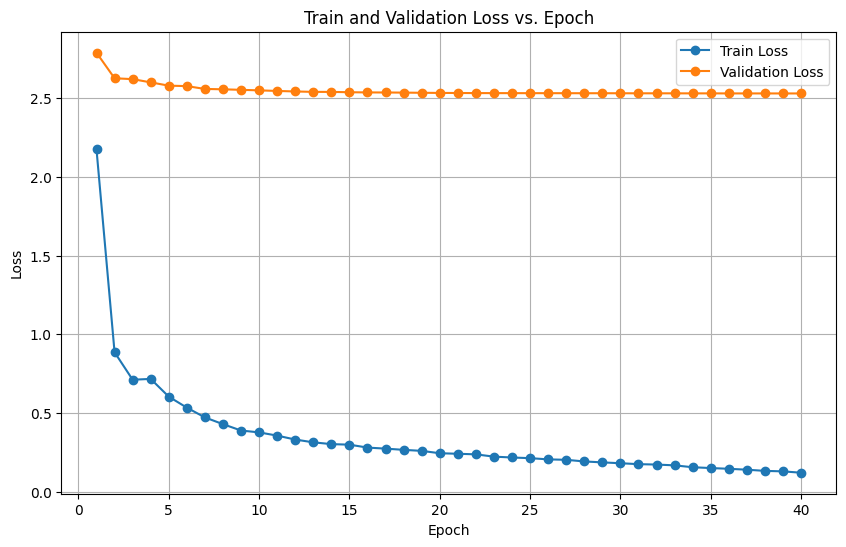

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results = '/kaggle/working/runs/classify/train/results.csv'
results_df = pd.read_csv(results)

# Strip leading and trailing whitespaces
results_df.columns = results_df.columns.str.strip()

plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['train/loss'], label='Train Loss', marker='o')
plt.plot(results_df['epoch'], results_df['val/loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss vs. Epoch')
plt.legend()
plt.grid()
plt.show()

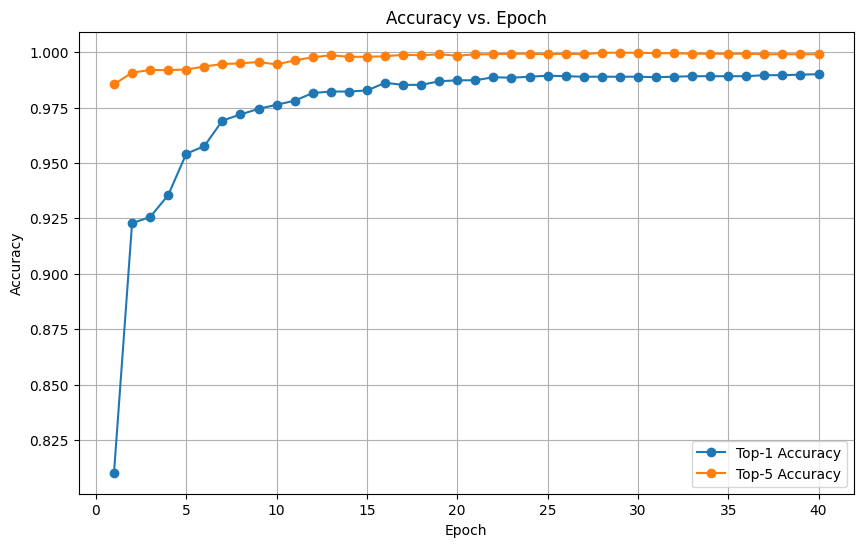

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['metrics/accuracy_top1'], label='Top-1 Accuracy', marker='o')
plt.plot(results_df['epoch'], results_df['metrics/accuracy_top5'], label='Top-5 Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

# Predictions
---

In [8]:
# Test images path
test_dir = '/kaggle/input/haik-24-arabic-sign-language-image-classification/test/test'

# Using the best model for inference
model_path = '/kaggle/working/runs/classify/train6/weights/best.pt'
submission_file = 'submission3.csv'

# Loading the trained model
model = YOLO(model_path)

In [32]:
list = os.listdir(test_dir)
len(list)

10797

In [9]:
# List to store the predictions
predictions = []

# Iterate through test images
for image_name in os.listdir(test_dir):
        # Full path to the image
        image_path = os.path.join(test_dir, image_name)

        # Make prediction
        results = model.predict(image_path,verbose = False)

        # Extract the label with the highest probability
        top1 = results[0].probs.top1
        predicted_label = results[0].names[top1]

        # Append the result to the predictions list
        predictions.append([image_name, predicted_label])


# Convert the predictions list to a DataFrame
df = pd.DataFrame(predictions, columns=['Image', 'Label'])

# Save the DataFrame to a CSV file
df.to_csv(submission_file, index=False)

print(f'Submission file saved as {submission_file}')


Submission file saved as submission3.csv
